In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn import svm

In [2]:
Test_set=pd.read_csv('dengue_features_test.csv')
Train_set=pd.read_csv('dengue_features_train.csv')
Labels_train = pd.read_csv('dengue_labels_train.csv')

Looking at the data, and how it is labeled, I must apply Supervised Learning. For now I'll stick to logistic regression supervised learning.

In [3]:
Test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 24 columns):
city                                     416 non-null object
year                                     416 non-null int64
weekofyear                               416 non-null int64
week_start_date                          416 non-null object
ndvi_ne                                  373 non-null float64
ndvi_nw                                  405 non-null float64
ndvi_se                                  415 non-null float64
ndvi_sw                                  415 non-null float64
precipitation_amt_mm                     414 non-null float64
reanalysis_air_temp_k                    414 non-null float64
reanalysis_avg_temp_k                    414 non-null float64
reanalysis_dew_point_temp_k              414 non-null float64
reanalysis_max_air_temp_k                414 non-null float64
reanalysis_min_air_temp_k                414 non-null float64
reanalysis_precip_amt_kg_per_m2  

In [4]:
Train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
city                                     1456 non-null object
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
week_start_date                          1456 non-null object
ndvi_ne                                  1262 non-null float64
ndvi_nw                                  1404 non-null float64
ndvi_se                                  1434 non-null float64
ndvi_sw                                  1434 non-null float64
precipitation_amt_mm                     1443 non-null float64
reanalysis_air_temp_k                    1446 non-null float64
reanalysis_avg_temp_k                    1446 non-null float64
reanalysis_dew_point_temp_k              1446 non-null float64
reanalysis_max_air_temp_k                1446 non-null float64
reanalysis_min_air_temp_k                1446 non-null float64
reanalysis_precip

In [5]:
Train_set.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,...,1446.000000,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,...,40.151819,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360
std,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,...,43.434399,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,...,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000
25%,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,...,13.055000,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000
50%,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,...,27.245000,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000
75%,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,...,52.200000,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,...,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000


In [6]:
Labels_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 4 columns):
city           1456 non-null object
year           1456 non-null int64
weekofyear     1456 non-null int64
total_cases    1456 non-null int64
dtypes: int64(3), object(1)
memory usage: 45.6+ KB


In [7]:
all_train = pd.concat([Train_set, Labels_train['total_cases']], sort=False, axis=1)
all_train['city']=all_train['city'].astype('category')

all_train.fillna(method='ffill', inplace=True)
#imputer = SimpleImputer(missing_values =np.nan, strategy='mean')


#nan_labels= list(all_train.columns[4:-1])
#imputer=imputer.fit(all_train[nan_labels])

#all_train[nan_labels] = imputer.transform(all_train[nan_labels].values)

#filling missing data with means

In [8]:
all_train = pd.get_dummies(all_train, columns = ['city'])
standardScaler = StandardScaler()
scale_cols = ['precipitation_amt_mm', 'reanalysis_sat_precip_amt_mm','reanalysis_dew_point_temp_k',
             'reanalysis_air_temp_k','reanalysis_relative_humidity_percent',
             'reanalysis_specific_humidity_g_per_kg','reanalysis_precip_amt_kg_per_m2',
             'reanalysis_max_air_temp_k','reanalysis_min_air_temp_k','reanalysis_avg_temp_k',
           'reanalysis_tdtr_k', 'ndvi_se', 'ndvi_sw', 'ndvi_ne', 'ndvi_nw']

all_train[scale_cols] = standardScaler.fit_transform(all_train[scale_cols])
#scaling some of the data

In [9]:
all_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 26 columns):
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
week_start_date                          1456 non-null object
ndvi_ne                                  1456 non-null float64
ndvi_nw                                  1456 non-null float64
ndvi_se                                  1456 non-null float64
ndvi_sw                                  1456 non-null float64
precipitation_amt_mm                     1456 non-null float64
reanalysis_air_temp_k                    1456 non-null float64
reanalysis_avg_temp_k                    1456 non-null float64
reanalysis_dew_point_temp_k              1456 non-null float64
reanalysis_max_air_temp_k                1456 non-null float64
reanalysis_min_air_temp_k                1456 non-null float64
reanalysis_precip_amt_kg_per_m2          1456 non-null float64
reanalysis_relat

https://stackoverflow.com/questions/39409866/correlation-heatmap

In [10]:
all_train.head()

,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,city_iq,city_sj
0,1990,18,1990-04-30,-0.062619,-0.203670,-0.055424,-0.291644,-0.760139,-0.826384,-1.171427,...,-1.772476,-0.641063,25.442857,6.900000,29.4,20.0,16.0,4,0,1
1,1990,19,1990-05-07,0.278949,0.118034,-0.541096,-0.556484,-0.522502,-0.357358,-0.616859,...,-0.890359,-0.713680,26.714286,6.371429,31.7,22.2,8.6,5,0,1
2,1990,20,1990-05-14,-0.715063,0.375662,-0.610427,-0.372705,-0.254704,0.061303,-0.271668,...,0.066811,-0.733851,26.714286,6.485714,32.2,22.8,41.4,4,0,1
3,1990,21,1990-05-21,-0.019050,0.978910,0.335437,0.405659,-0.692961,0.212399,0.005616,...,-0.047160,-0.697543,27.471429,6.771429,33.3,23.3,4.0,3,0,1
4,1990,22,1990-05-28,0.468869,1.122261,0.653287,0.542732,-0.872102,0.602730,0.350807,...,0.301239,-0.532139,28.942857,9.371429,35.0,23.9,5.8,6,0,1


In [11]:
corr=all_train.corr()

cmap = sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,city_iq,city_sj
year,1,-0.072,0.2,0.15,0.25,0.28,0.21,-0.14,0.088,0.14,0.48,-0.39,0.13,0.34,0.21,0.17,0.49,0.05,0.38,0.23,-0.21,0.22,-0.31,0.55,-0.55
weekofyear,-0.072,1,0.024,0.035,0.1,0.064,0.12,0.42,0.46,0.35,0.23,0.18,0.072,-0.012,0.12,0.35,0.076,0.36,0.022,0.23,0.29,0.064,0.22,2e-05,-2e-05
ndvi_ne,0.2,0.024,1,0.82,0.59,0.65,0.2,-0.33,-0.038,0.055,0.62,-0.61,0.19,0.46,0.2,0.092,0.67,0.18,0.66,0.48,-0.3,0.23,-0.21,0.71,-0.71
ndvi_nw,0.15,0.035,0.82,1,0.55,0.65,0.19,-0.32,-0.032,0.064,0.61,-0.59,0.19,0.45,0.19,0.1,0.65,0.2,0.65,0.48,-0.3,0.21,-0.17,0.69,-0.69
ndvi_se,0.25,0.1,0.59,0.55,1,0.81,0.084,-0.16,0.051,0.0056,0.47,-0.41,0.038,0.22,0.084,0.032,0.49,0.089,0.45,0.28,-0.25,0.13,-0.21,0.48,-0.48
ndvi_sw,0.28,0.064,0.65,0.65,0.81,1,0.13,-0.23,0.024,0.025,0.55,-0.49,0.1,0.31,0.13,0.057,0.57,0.12,0.54,0.37,-0.29,0.16,-0.15,0.58,-0.58
precipitation_amt_mm,0.21,0.12,0.2,0.19,0.084,0.13,1,-0.015,0.11,0.44,0.29,-0.12,0.48,0.5,1,0.45,0.2,0.23,0.19,0.29,0.081,0.48,-0.043,0.32,-0.32
reanalysis_air_temp_k,-0.14,0.42,-0.33,-0.32,-0.16,-0.23,-0.015,1,0.9,0.53,0.0018,0.74,-0.13,-0.4,-0.015,0.51,-0.28,0.61,-0.26,0.23,0.72,-0.17,0.26,-0.45,0.45
reanalysis_avg_temp_k,0.088,0.46,-0.038,-0.032,0.051,0.024,0.11,0.9,1,0.61,0.4,0.44,-0.032,-0.17,0.11,0.61,0.13,0.74,0.11,0.51,0.58,-0.051,0.15,-0.053,0.053
reanalysis_dew_point_temp_k,0.14,0.35,0.055,0.064,0.0056,0.025,0.44,0.53,0.61,1,0.26,0.36,0.43,0.55,0.44,1,-0.03,0.74,0.034,0.49,0.65,0.24,0.14,0.12,-0.12


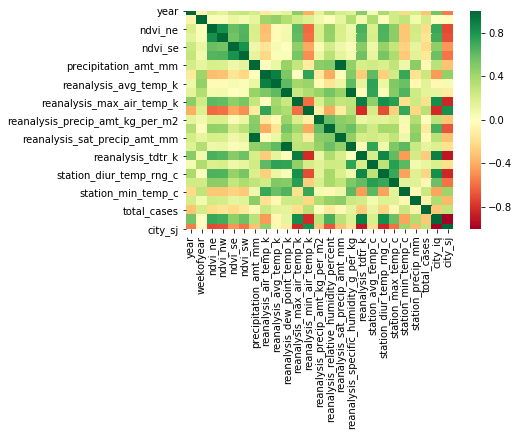

In [12]:
sns.heatmap(all_train.corr(),cmap='RdYlGn')

https://stackoverflow.com/questions/46188580/pandas-dataframe-hist-change-title-size-on-subplot/46189639#46189639

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

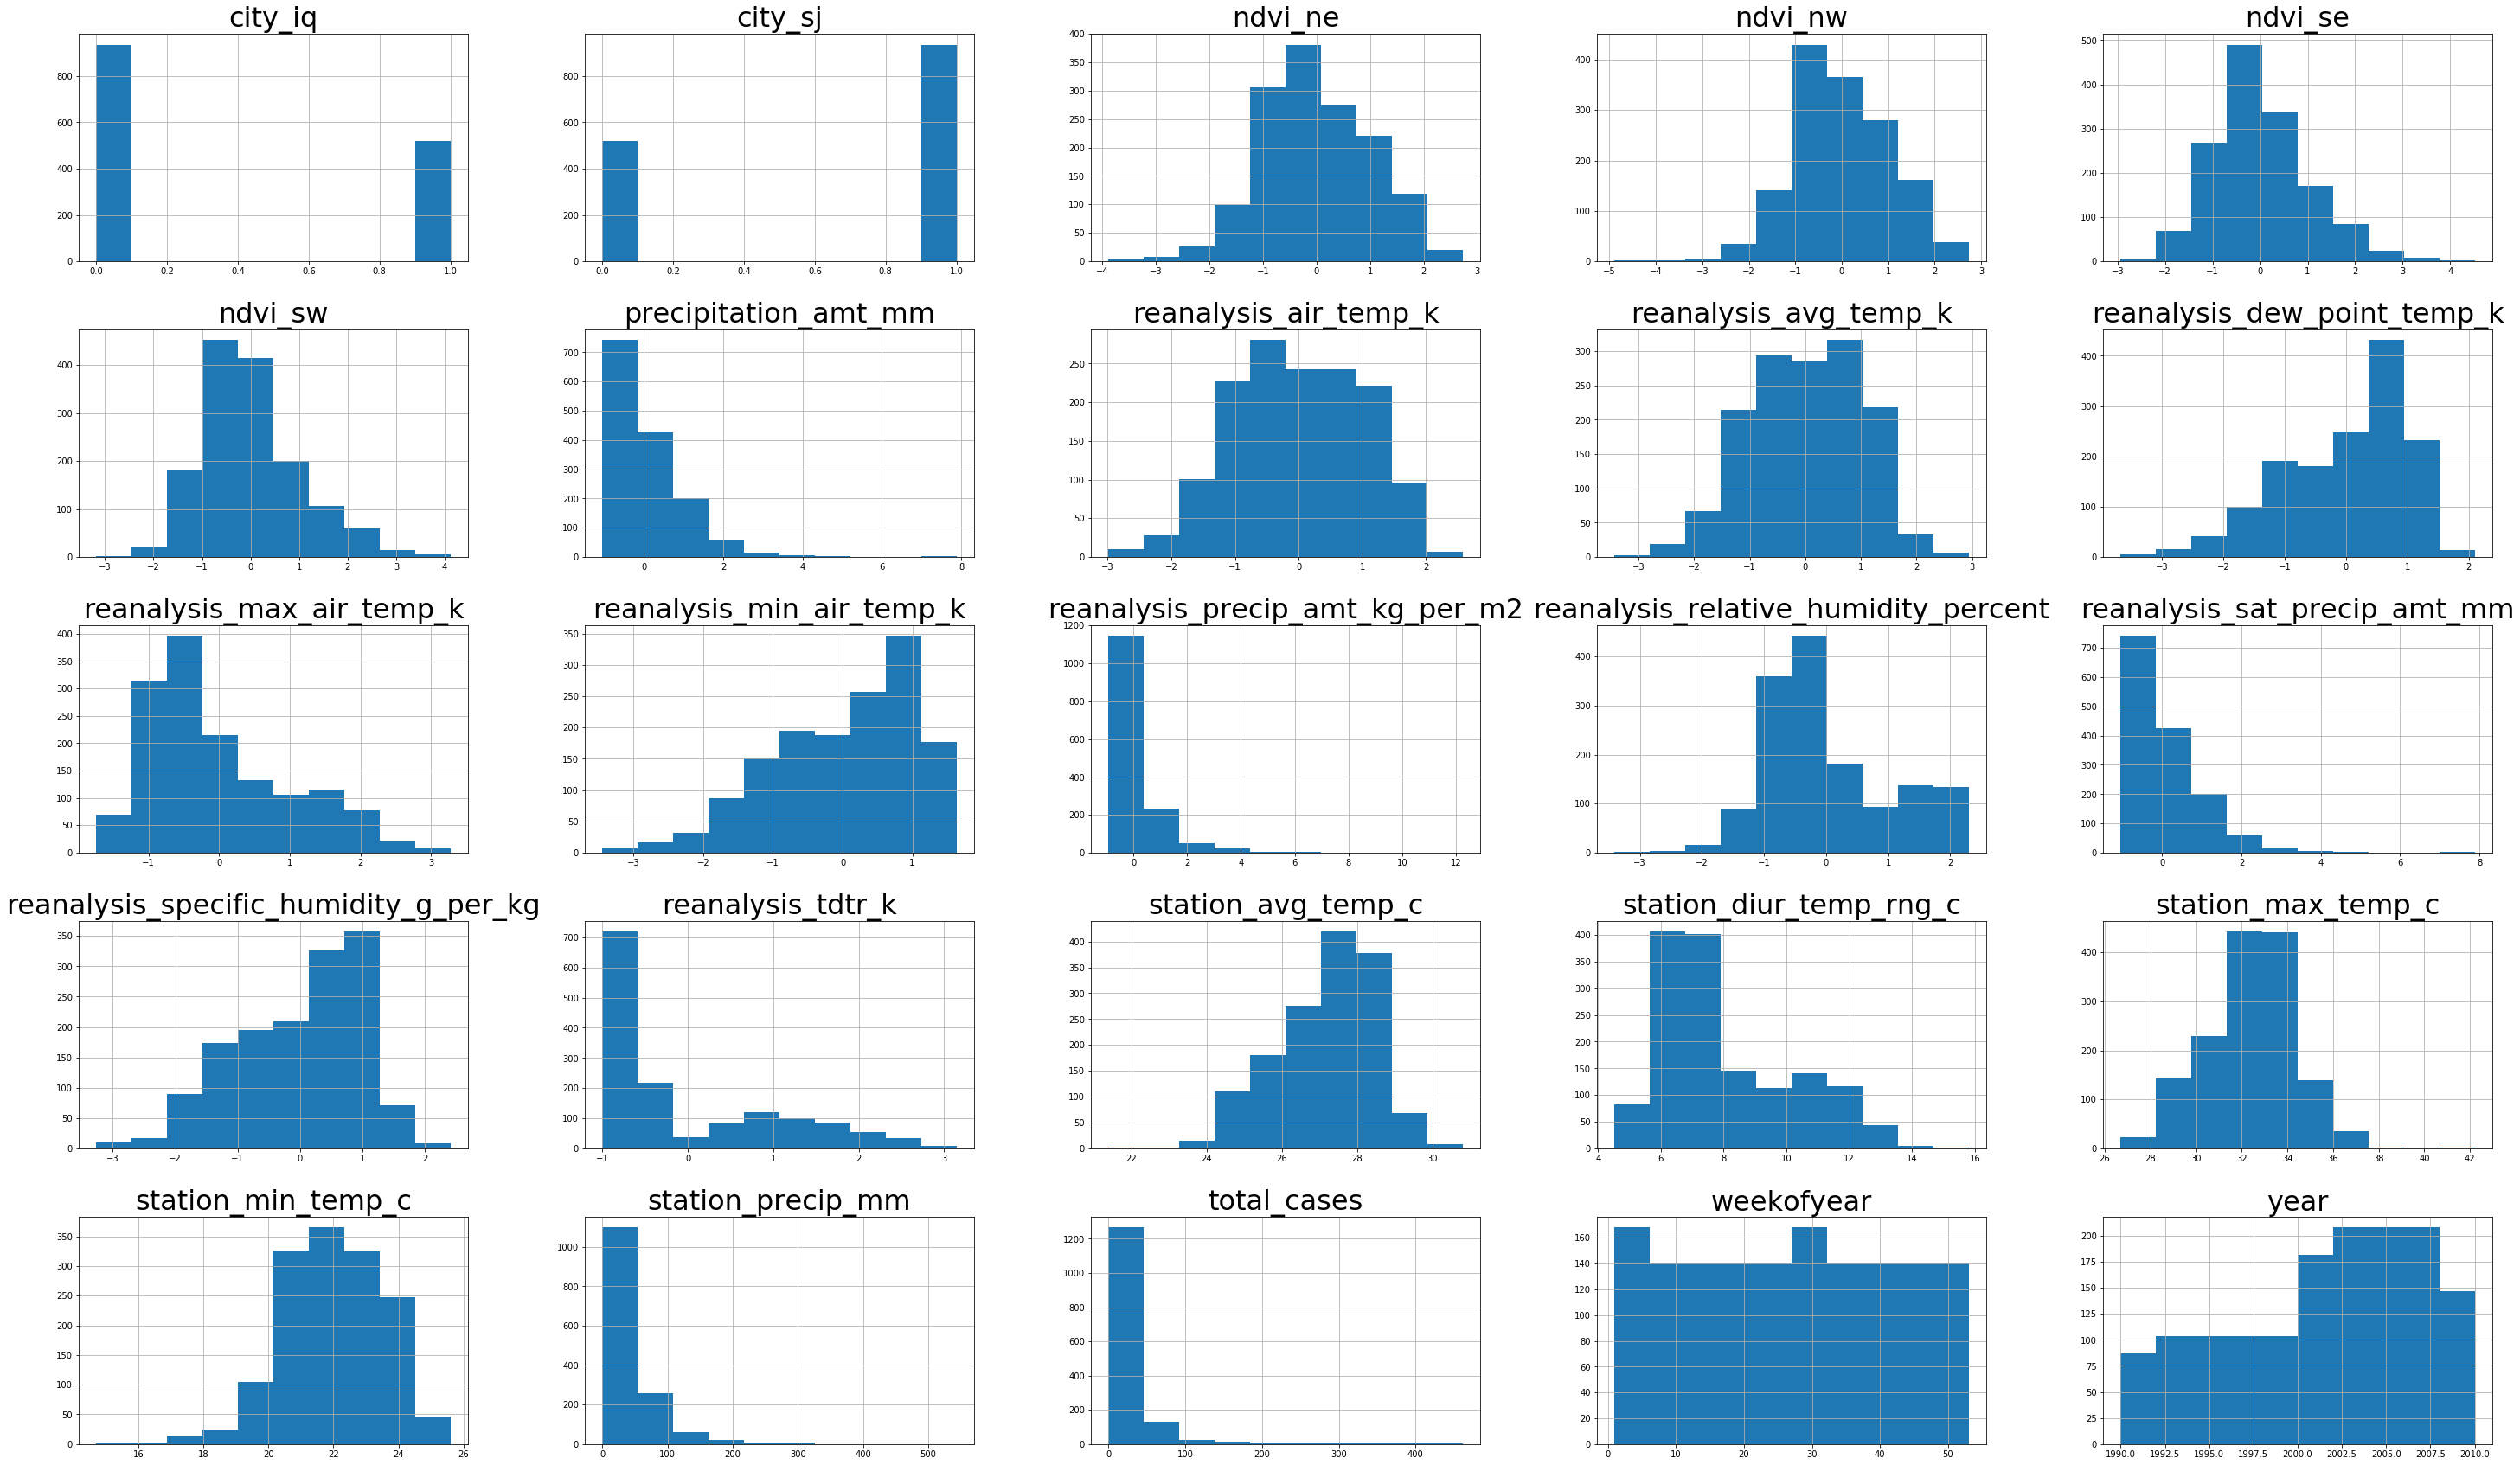

In [13]:
fig = all_train.hist(figsize=(50,30))
[x.title.set_size(32) for x in fig.ravel()]

In [14]:
X = all_train[['ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw','precipitation_amt_mm', 
                          'reanalysis_air_temp_k', 'reanalysis_avg_temp_k',
                         'reanalysis_dew_point_temp_k','reanalysis_max_air_temp_k',
                         'reanalysis_min_air_temp_k','reanalysis_precip_amt_kg_per_m2',
                         'reanalysis_relative_humidity_percent','reanalysis_sat_precip_amt_mm',
                         'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
                         'station_avg_temp_c','station_diur_temp_rng_c', 'station_max_temp_c',
                         'station_min_temp_c','station_precip_mm','city_iq','city_sj']].values
y=all_train[['total_cases']].values

https://stackoverflow.com/questions/54345667/onehotencoder-categorical-features-depreciated-how-to-transform-specific-column

In [15]:
X

array([[-0.06261869, -0.20367047, -0.05542406, ..., 16.        ,
         0.        ,  1.        ],
       [ 0.27894877,  0.11803367, -0.54109632, ...,  8.6       ,
         0.        ,  1.        ],
       [-0.71506308,  0.37566221, -0.61042718, ..., 41.4       ,
         0.        ,  1.        ],
       ...,
       [ 0.83612328,  0.15051449,  0.64195529, ...,  7.4       ,
         1.        ,  0.        ],
       [ 1.46334512,  0.98480586,  1.02548718, ..., 16.        ,
         1.        ,  0.        ],
       [ 1.20533821,  0.87771059,  0.96268596, ..., 20.4       ,
         1.        ,  0.        ]])

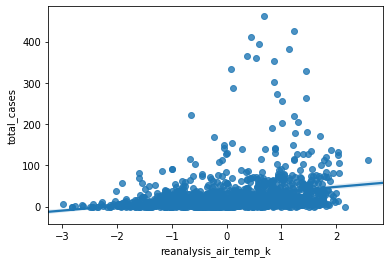

In [16]:
sns.regplot(y='total_cases',x='reanalysis_air_temp_k',data=all_train)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [18]:
regressor = LinearRegression(n_jobs=-1)
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [19]:
y_pred= regressor.predict(X_test)
y_pred

array([[ 45.01005478],
       [ 54.1541999 ],
       [ 26.56536941],
       [ 40.14042303],
       [ 11.84222848],
       [ 25.44197415],
       [ -1.30573981],
       [ 32.73642156],
       [ 27.68446599],
       [ 45.27589257],
       [ 21.94733793],
       [ 41.31274753],
       [ 33.20966972],
       [ -6.92626882],
       [ 13.30426712],
       [ 21.1526924 ],
       [ 33.36381457],
       [  3.38927963],
       [ 38.3030507 ],
       [ 26.22104129],
       [ 32.67380227],
       [ 42.70137205],
       [  9.00169196],
       [ 15.95745459],
       [  3.15537217],
       [ 41.19192443],
       [ 25.56429508],
       [ 26.28756213],
       [ 42.24264059],
       [ 44.94996675],
       [ 41.90314741],
       [ -1.51594613],
       [ 24.30637661],
       [ 12.73952768],
       [ 13.73639538],
       [ 27.41701927],
       [ 15.7327202 ],
       [ 40.49033277],
       [ 13.10286474],
       [ 11.45868611],
       [ 36.31813358],
       [ 27.97234585],
       [ 13.20980416],
       [ 47

In [20]:
regressor.score(X_test,y_test)

0.14322301216879985

In [21]:
print(regressor.intercept_)

[-81.67763294]


In [22]:
print(regressor.coef_)

[[-2.27801431e-02  1.98624495e+00 -1.04362145e+01  9.36088213e+00
  -5.54097153e-01  1.56338878e+01 -1.34680214e+01 -3.15589984e+01
   5.23583472e+00  1.28370404e+00  1.08025629e+00  2.32263979e+00
  -5.54097153e-01  3.21313388e+01 -6.11440495e-01  1.89604437e-01
  -1.22767324e+00  2.40924784e+00  1.26511085e+00  1.01181496e-02
  -1.39988340e+01  1.39988340e+01]]


In [23]:
r2_score(y_test,y_pred)

0.14322301216879985

In [24]:
X_train

array([[-6.16251660e-01, -4.79984627e-01, -6.18301192e-01, ...,
         3.80000000e+01,  0.00000000e+00,  1.00000000e+00],
       [-1.70216048e-01, -6.27240618e-01,  1.11229628e+00, ...,
         2.91000000e+01,  0.00000000e+00,  1.00000000e+00],
       [-1.36998071e-01, -1.89656053e-01, -3.42662538e-02, ...,
         3.12000000e+01,  0.00000000e+00,  1.00000000e+00],
       ...,
       [ 1.13768185e+00,  1.34613273e+00,  8.53214701e-01, ...,
         1.50900000e+02,  1.00000000e+00,  0.00000000e+00],
       [-8.64905042e-01, -1.16996822e+00, -1.53631873e+00, ...,
         8.87000000e+01,  0.00000000e+00,  1.00000000e+00],
       [ 7.46166836e-01, -4.16815153e-01,  9.06989774e-01, ...,
         1.35000000e+01,  0.00000000e+00,  1.00000000e+00]])

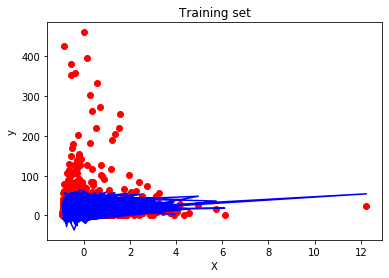

In [25]:
plt.scatter(X_train[:,10], y_train, color='red')
plt.plot(X_train[:,10], regressor.predict(X_train), color='blue')
plt.title('Training set')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

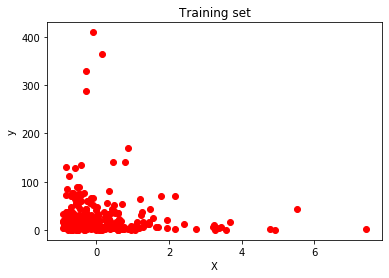

In [26]:
plt.scatter(X_test[:,10], y_test, color='red')
#plt.plot(X_train[:,10], regressor.predict(X_train[:,10]), color='blue')
plt.title('Training set')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

C:\Users\HGSM\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\HGSM\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\HGSM\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\HGSM\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usi

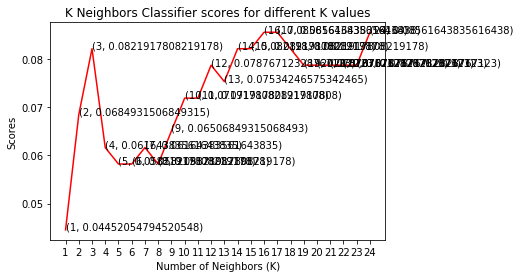

In [27]:
knn_scores = []
for k in range(1,25):
    knn_test = KNeighborsClassifier(n_neighbors=k)
    knn_test.fit(X_train, y_train)
    knn_scores.append(knn_test.score(X_test, y_test))
    
plt.plot([k for k in range(1, 25)], knn_scores, color = 'red')
for i in range(1,25):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 25)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')
plt.show()

In [28]:
knn = KNeighborsClassifier(n_neighbors=5)
cross_val_score(knn,X,y,cv=10,scoring='accuracy').mean()

C:\Users\HGSM\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\HGSM\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HGSM\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HGSM\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when

0.06760996097973493

In [29]:
logreg=LogisticRegression()
cross_val_score(logreg,X,y,cv=10,scoring='accuracy').mean()

C:\Users\HGSM\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\HGSM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HGSM\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HGSM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\HGSM

0.08501207138278992

With this i can conclude that the best (at the moment) model to train my algorithm is linear regression

https://github.com/drivendataorg/box-plots-sklearn/blob/master/src/data/multilabel.py